# 📊 Sales Analysis Report
**Author:** Kareem Khaled Aboelfetoh  
**Email:** karemkhaled758@gmail.com  
**GitHub:** https://github.com/k-aboelfetoh

# ✅ Data Load

In [1]:
import pandas as pd

In [4]:
Data = pd.read_csv("Sales Data.csv")

# 📈 Analysis & Aggregation

In [5]:
df = pd.DataFrame(Data)

In [6]:
print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City   0.0  
1   600.00   New

In [7]:
print(df.describe())

         Unnamed: 0       Order ID  Quantity Ordered    Price Each  \
count  43277.000000   43277.000000      43277.000000  43277.000000   
mean   11134.832914  255962.197218          1.125032    184.096935   
std     6710.675368   60744.754365          0.441631    332.163546   
min        0.000000  176558.000000          1.000000      2.990000   
25%     5437.000000  186936.000000          1.000000     11.950000   
50%    10873.000000  298871.000000          1.000000     14.950000   
75%    16310.000000  309257.000000          1.000000    150.000000   
max    25116.000000  319670.000000          7.000000   1700.000000   

              Month         Sales          Hour  
count  43277.000000  43277.000000  43276.000000  
mean       8.611364    185.210187     14.378616  
std        3.955754    332.613791      5.419893  
min        1.000000      2.990000      0.000000  
25%        4.000000     11.950000     11.000000  
50%       12.000000     14.950000     15.000000  
75%       12.000000

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43277 entries, 0 to 43276
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        43277 non-null  int64  
 1   Order ID          43277 non-null  int64  
 2   Product           43277 non-null  object 
 3   Quantity Ordered  43277 non-null  int64  
 4   Price Each        43277 non-null  float64
 5   Order Date        43277 non-null  object 
 6   Purchase Address  43277 non-null  object 
 7   Month             43277 non-null  int64  
 8   Sales             43277 non-null  float64
 9   City              43277 non-null  object 
 10  Hour              43276 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 3.6+ MB
None


In [11]:
df.dropna(how='any', inplace=True)

In [13]:
Total_Revenue = df['Sales'].sum()
print("Total Revenue:", Total_Revenue)

Total Revenue: 8015337.439999998


In [14]:
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

Month
1        8670.29
4     3385481.03
5       10559.29
12    4610626.83
Name: Sales, dtype: float64


In [15]:
city_sales = df.groupby('City')['Sales'].sum()
print(city_sales)

City
Atlanta           644964.19
Austin            406960.66
Boston            864691.27
Dallas            635224.70
Los Angeles      1234861.99
New York City    1094225.29
Portland          544987.53
San Francisco    1925970.59
Seattle           663451.22
Name: Sales, dtype: float64


In [17]:
hour_orders = df.groupby('Hour').count()['Product']
print(hour_orders)

Hour
0.0      875
1.0      564
2.0      287
3.0      199
4.0      215
5.0      334
6.0      586
7.0      969
8.0     1476
9.0     1996
10.0    2644
11.0    2857
12.0    2894
13.0    2833
14.0    2604
15.0    2386
16.0    2389
17.0    2444
18.0    2894
19.0    3077
20.0    2836
21.0    2434
22.0    2027
23.0    1456
Name: Product, dtype: int64


In [18]:
best_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(best_products)

Product
AAA Batteries (4-pack)        7176
AA Batteries (4-pack)         6539
USB-C Charging Cable          5521
Lightning Charging Cable      5459
Wired Headphones              4814
Apple Airpods Headphones      3604
Bose SoundSport Headphones    3113
27in FHD Monitor              1702
iPhone                        1603
34in Ultrawide Monitor        1502
27in 4K Gaming Monitor        1426
Google Phone                  1297
Flatscreen TV                 1124
Macbook Pro Laptop            1099
20in Monitor                   966
ThinkPad Laptop                933
Vareebadd Phone                505
LG Dryer                       163
LG Washing Machine             141
Name: Quantity Ordered, dtype: int64


In [19]:
# Summary Table
summary = df.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Sales': 'sum'
}).sort_values(by='Sales', ascending=False)

print(summary)

                            Quantity Ordered       Sales
Product                                                 
Macbook Pro Laptop                      1099  1868300.00
iPhone                                  1603  1122100.00
ThinkPad Laptop                          933   932990.67
Google Phone                            1297   778200.00
34in Ultrawide Monitor                  1502   570744.98
27in 4K Gaming Monitor                  1426   556125.74
Apple Airpods Headphones                3604   540600.00
Flatscreen TV                           1124   337200.00
Bose SoundSport Headphones              3113   311268.87
27in FHD Monitor                        1702   255282.98
Vareebadd Phone                          505   202000.00
20in Monitor                             966   106250.34
LG Dryer                                 163    97800.00
LG Washing Machine                       141    84600.00
Lightning Charging Cable                5459    81612.05
USB-C Charging Cable           

##📊 Visualizations

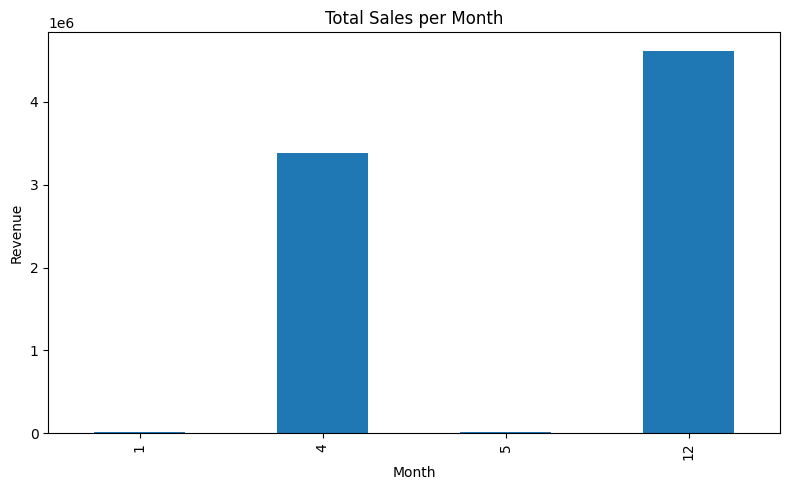

In [21]:
import matplotlib.pyplot as plt

# Bar Chart: Monthly Sales
monthly_sales.plot(kind='bar', title="Total Sales per Month", figsize=(8, 5))
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("monthly_sales.png")
plt.show()

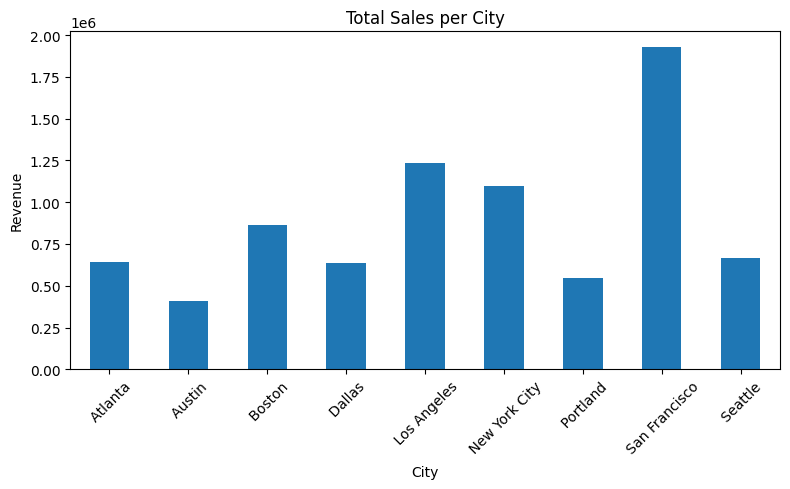

In [23]:

# Bar Chart: Sales by City
city_sales.plot(kind='bar', title="Total Sales per City", figsize=(8, 5))
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("city_sales.png")
plt.show()

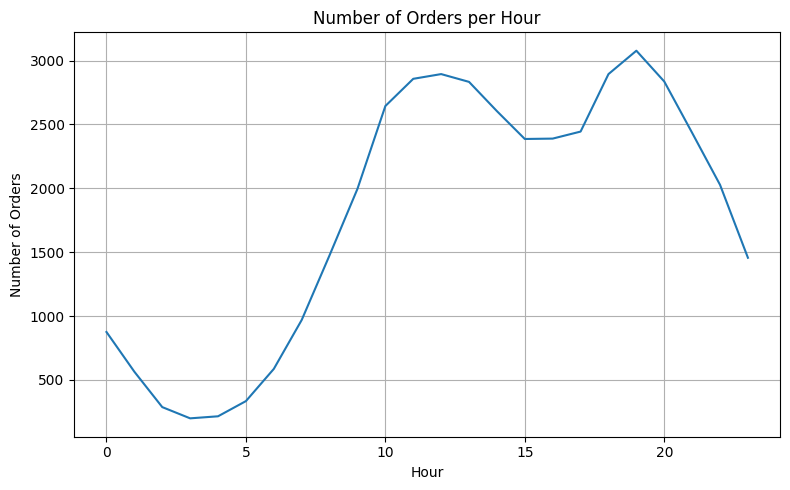

In [25]:
# Line Chart: Orders per Hour
hour_orders.plot(kind='line', title="Number of Orders per Hour", figsize=(8, 5))
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.tight_layout()
plt.savefig("hour_orders.png")
plt.show()

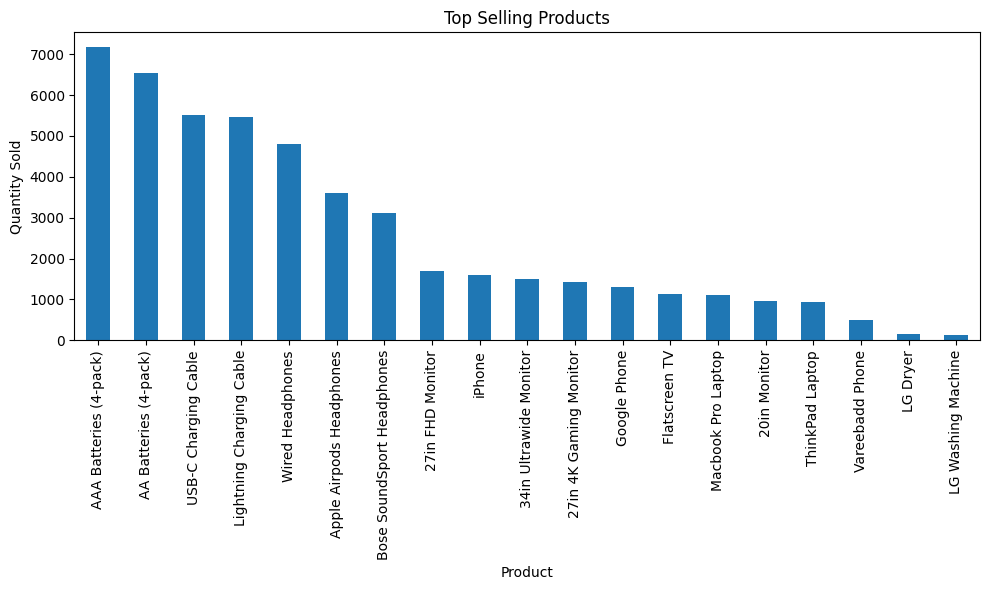

In [27]:
# Bar Chart: Top Selling Products
best_products.plot(kind='bar', title="Top Selling Products", figsize=(10, 6))
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("top_products.png")
plt.show()

In [28]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=a42afbe0aac4f5add092c694d6f64f99a31029bee462d61515f82bed0d51d602
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


## 🧾 Export PDF Report

In [32]:
from fpdf import FPDF
from datetime import datetime

# Create PDF
pdf = FPDF()
pdf.add_page()

# Set Title
pdf.set_font("Arial", 'B', 20)
pdf.set_text_color(30, 30, 30)
pdf.cell(200, 15, txt="Sales Analysis Report", ln=True, align='C')

# Author Info
pdf.set_font("Arial", '', 12)
pdf.set_text_color(50, 50, 50)
pdf.ln(5)
pdf.cell(200, 10, txt="Prepared by: Kareem Khaled Aboelfetoh", ln=True)
pdf.cell(200, 10, txt="Email: karemkhaled758@gmail.com", ln=True)
pdf.cell(200, 10, txt="GitHub: https://github.com/k-aboelfetoh", ln=True)
pdf.cell(200, 10, txt=f"Date: {datetime.today().strftime('%Y-%m-%d')}", ln=True)
pdf.ln(5)

# Summary
pdf.set_font("Arial", 'B', 14)
pdf.set_text_color(0, 0, 80)
pdf.cell(200, 10, txt="Summary", ln=True)
pdf.set_font("Arial", '', 12)
pdf.set_text_color(0, 0, 0)
pdf.cell(200, 10, txt=f"Total Revenue: ${Total_Revenue:,.2f}", ln=True)
pdf.ln(5)

# Charts
pdf.set_font("Arial", 'B', 14)
pdf.set_text_color(0, 0, 80)
pdf.cell(200, 10, txt="Visual Charts", ln=True)
pdf.ln(5)

# Chart 1
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 8, txt="1. Total Sales per Month", ln=True)
pdf.image("monthly_sales.png", x=10, w=180)
pdf.ln(10)

# Chart 2
pdf.cell(200, 8, txt="2. Total Sales per City", ln=True)
pdf.image("city_sales.png", x=10, w=180)
pdf.ln(10)

# Chart 3
pdf.cell(200, 8, txt="3. Number of Orders per Hour", ln=True)
pdf.image("hour_orders.png", x=10, w=180)
pdf.ln(10)

# Chart 4
pdf.cell(200, 8, txt="4. Top Selling Products", ln=True)
pdf.image("top_products.png", x=10, w=180)
pdf.ln(10)

# Save final report
pdf.output("Final_sales_report.pdf")
print("✅ Report saved as 'Final_sales_report.pdf'")

✅ Report saved as 'Final_sales_report.pdf'
